# Categorical feature encoding challenge II

## Data description
In this competition, we will be predicting the probability [0, 1] of a binary target column.

The data contains binary features (bin_), nominal features (nom_), ordinal features (ord_*) as well as (potentially cyclical) day (of the week) and month features. The string ordinal features ord_{3-5} are lexically ordered according to string.ascii_letters.[Dataset](https://www.kaggle.com/c/cat-in-the-dat-ii)

Since the purpose of this competition is to explore various encoding strategies. Unlike the first Categorical Feature Encoding Challenge, the data for this challenge has missing values and feature interactions.

Files
train.csv - the training set
test.csv - the test set; you must make predictions against this data
sample_submission.csv - a sample submission file in the correct format

## Loading essential libraries for data analysis, visualization, modeling, tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.ensemble import BalancedRandomForestClassifier,BalancedBaggingClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import *

## Data loading within a function and task we have done

- Load the data inside a function 
- Took the sample from the whole dataset because original dataset was huge, to make our computation simple used sample data.
- clean the data and convert category into numeric for machine readable format
- Define input and target feature
- Apply class imbalance method SMOTE to make balance the target data
- Split the data into train and testing 

In [5]:
def load_data(input_=['../Integrify/cat-in-the-dat-ii/train.csv','../Integrify/cat-in-the-dat-ii/test.csv'],
             sample_f=0.05):
    train=pd.read_csv(input_[0])
    #TRAIN_=pd.read_csv(input_[1])
    if sample_f!=0:
        train=train.sample(frac=sample_f)
        
    train.loc[:, train.columns != 'id'] = train.loc[:, train.columns != 'id']\
            .astype('category').apply(lambda x: x.cat.codes)
    train.drop(['id'],axis=1,inplace=True)
    
    train_x=train.drop('target',axis=1)
    train_y=train['target']
    
    #undersample = CondensedNearestNeighbour(n_neighbors=1)

    #train_x,train_y = undersample.fit_resample(train_x,train_y)
    
    #clf = BalancedBaggingClassifier(random_state=42,n_estimators=10,bootstrap=False)
    #clf.fit(train_x,train_y) 
    
    train_x,train_y=SMOTE().fit_resample(train_x,train_y)
    
    x_train,x_test,y_train,y_test= train_test_split(train_x,train_y,test_size=0.2,random_state=42)
    
    return(x_train,x_test,y_train,y_test)

## Creating empty dataframe to view important accuracy information from different model I used

In [6]:
Result=pd.DataFrame({'Model Name':[],
                    'AUC_Train Accuracy':[],
                     'AUC_Test Accuracy':[],
                    'Train Accuracy':[],
                     'Test Accuracy':[],
                     'F1 Score_Train':[],
                     'F1 Score_Test':[]
                    })


In [7]:
x_train,x_test,y_train,y_test=load_data()

# Model selection

## Logistic Regression

In [8]:
Log_reg=LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.10)

Log_reg.fit(x_train,y_train)

C:\Users\BY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(l1_ratio=0.1, penalty='elasticnet', solver='saga')

In [9]:
print('train score:',Log_reg.score(x_train,y_train))
print('test score:',Log_reg.score(x_test,y_test))

train score: 0.6681501943932883
test score: 0.6651319828115408


In [10]:
y_train.value_counts()

1    19598
0    19498
Name: target, dtype: int64

In [11]:
Log_reg_pred_y_train=Log_reg.predict(x_train)

In [12]:
Log_reg_pred_y_test=Log_reg.predict(x_test)

In [13]:
Result=Result.append({'Model Name':'Logistic Regression',
                    'AUC_Train Accuracy':roc_auc_score(y_train,Log_reg_pred_y_train),
                     'AUC_Test Accuracy':roc_auc_score(y_test,Log_reg_pred_y_test),
                    'Train Accuracy':Log_reg.score(x_train,y_train),
                     'Test Accuracy':Log_reg.score(x_test,y_test),
                     'F1 Score_Train':f1_score(y_train,Log_reg_pred_y_train),
                      'F1 Score_Test':f1_score(y_test,Log_reg_pred_y_test)
                    },ignore_index=True)

## AdaBoost classifier

In [14]:
adb = AdaBoostClassifier(n_estimators=550, random_state=42)
adb.fit(x_train,y_train)
print(adb.score(x_train,y_train))
print(adb.score(x_test,y_test))

0.8191630857376714
0.8125639451606302


In [15]:
adb_pred_train=adb.predict(x_train)
adb_pred_test=adb.predict(x_test)

In [16]:
Result=Result.append({'Model Name':'Ada Boost Classifier',
                    'AUC_Train Accuracy':roc_auc_score(y_train,adb_pred_train),
                     'AUC_Test Accuracy':roc_auc_score(y_test,adb_pred_test),
                    'Train Accuracy':Log_reg.score(x_train,y_train),
                     'Test Accuracy':Log_reg.score(x_test,y_test),
                     'F1 Score_Train':f1_score(y_train,adb_pred_train),
                      'F1 Score_Test':f1_score(y_test,adb_pred_test)
                    },ignore_index=True)

In [17]:
Result

,Model Name,AUC_Train Accuracy,AUC_Test Accuracy,Train Accuracy,Test Accuracy,F1 Score_Train,F1 Score_Test
0,Logistic Regression,0.668067,0.665437,0.66815,0.665132,0.679131,0.672667
1,Ada Boost Classifier,0.819150,0.812609,0.66815,0.665132,0.820458,0.811832


## Decision Tree

In [18]:
DT=DecisionTreeClassifier(max_depth=5,max_leaf_nodes=9,min_samples_split=10)
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, min_samples_split=10)

In [19]:
print(DT.score(x_train,y_train))
print(DT.score(x_test,y_test))


0.7110190300798036
0.7105586249232658


In [20]:
param={'max_depth':[2,3,4,5,6,7],
      'max_leaf_nodes':[4,5,7,8,9]
      }
grid=GridSearchCV(DecisionTreeClassifier(random_state=40),
                 param_grid=param, 
                 n_jobs=1,
                cv=3)

In [21]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=40), n_jobs=1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_leaf_nodes': [4, 5, 7, 8, 9]})

In [22]:
grid.best_params_

{'max_depth': 7, 'max_leaf_nodes': 9}

In [23]:
DT_pred_train=DT.predict(x_train)
DT_pred_test=DT.predict(x_test)

In [24]:
Result=Result.append({'Model Name':'Decision Tree',
                    'AUC_Train Accuracy':roc_auc_score(y_train,DT_pred_train),
                     'AUC_Test Accuracy':roc_auc_score(y_test,DT_pred_test),
                    'Train Accuracy':DT.score(x_train,y_train),
                     'Test Accuracy':DT.score(x_test,y_test),
                     'F1 Score_Train':f1_score(y_train,DT_pred_train),
                      'F1 Score_Test':f1_score(y_test,DT_pred_test)
                    },ignore_index=True)

## Random Forest

In [25]:
rf=RandomForestClassifier(n_estimators=100,max_depth=7,max_leaf_nodes=10,random_state=42,n_jobs=-1)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_leaf_nodes=10, n_jobs=-1,
                       random_state=42)

In [26]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))


0.76048700634336
0.76048700634336


In [27]:
rf_pred_train=rf.predict(x_train)
rf_pred_test=rf.predict(x_test)

In [28]:
Result=Result.append({'Model Name':'Random Forest',
                    'AUC_Train Accuracy':roc_auc_score(y_train,rf_pred_train),
                     'AUC_Test Accuracy':roc_auc_score(y_test,rf_pred_test),
                    'Train Accuracy':rf.score(x_train,y_train),
                     'Test Accuracy':rf.score(x_test,y_test),
                     'F1 Score_Train':f1_score(y_train,rf_pred_train),
                      'F1 Score_Test':f1_score(y_test,rf_pred_test)
                    },ignore_index=True)

# Feature selection using variance Threshold

In [29]:
pipe=Pipeline([
                      ('feature_selection', VarianceThreshold(0.95)),
                      ('classification',adb )
                    ])


In [30]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('feature_selection', VarianceThreshold(threshold=0.95)),
                ('classification',
                 AdaBoostClassifier(n_estimators=550, random_state=42))])

In [31]:
y_pred=pipe.predict(x_test)

In [32]:
roc_auc_score(y_test,y_pred)



0.7915997931179083

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      4937
           1       0.78      0.80      0.79      4837

    accuracy                           0.79      9774
   macro avg       0.79      0.79      0.79      9774
weighted avg       0.79      0.79      0.79      9774



In [34]:
print(pipe.score(x_train,y_train))
print(pipe.score(x_test,y_test))

0.7980100266011868
0.791487620216902


## Create function to visualize the accuracy matrix

In [35]:
def predict_and_plot(inputs, targets, name=''):
    preds = pipe.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 79.80%


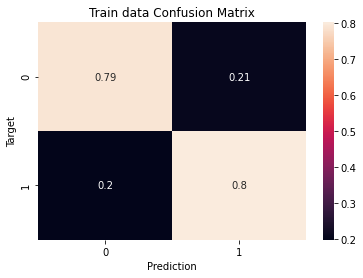

In [36]:
train_preds = predict_and_plot(x_train, y_train, 'Train data')

Accuracy: 79.15%


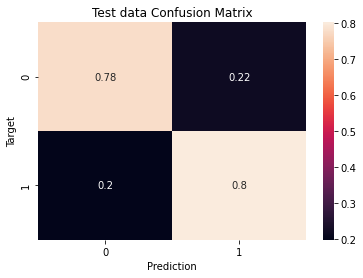

In [37]:
test_preds = predict_and_plot(x_test, y_test, 'Test data')

In [38]:
tr_pred=pipe.predict(x_train)
tes_pred=pipe.predict(x_test)

In [39]:
Result=Result.append({'Model Name':'Ada Boost after Variance Threshold',
                    'AUC_Train Accuracy':roc_auc_score(y_train,tr_pred),
                     'AUC_Test Accuracy':roc_auc_score(y_test,tes_pred),
                    'Train Accuracy':pipe.score(x_train,y_train),
                     'Test Accuracy':pipe.score(x_test,y_test),
                     'F1 Score_Train':f1_score(y_train,tr_pred),
                      'F1 Score_Test':f1_score(y_test,tes_pred)
                    },ignore_index=True)

# Feature selection using mutual_info classifier

In [40]:
mi_clf=feature_selection.mutual_info_classif(x_train,y_train,discrete_features=True)

In [41]:
pipe=Pipeline([
                      ('feature_selection', feature_selection.SelectKBest(score_func=feature_selection.mutual_info_classif)),
                      ('classification',adb )
                    ])

In [42]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x000001AA8EF6CC10>)),
                ('classification',
                 AdaBoostClassifier(n_estimators=550, random_state=42))])

In [43]:
print('train score:',pipe.score(x_train,y_train))


train score: 0.791231839574381


In [44]:
pipe.score(x_test,y_test)

0.7848373235113567

In [45]:
confusion_matrix(y_test,y_pred)

array([[3854, 1083],
       [ 955, 3882]], dtype=int64)

In [46]:
roc_auc_score(y_test,pipe.predict(x_test))

0.7848744710539065

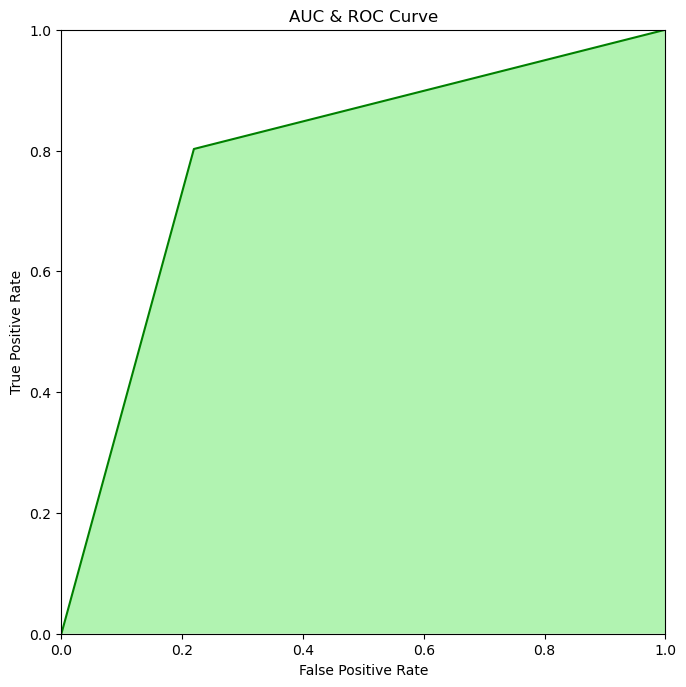

In [47]:
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
#plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")
plt.show()

In [48]:
mi_train=pipe.predict(x_train)
mi_test=pipe.predict(x_test)

In [49]:
Result=Result.append({'Model Name':'Ada Boost after Mutual info classifier',
                    'AUC_Train Accuracy':roc_auc_score(y_train,mi_train),
                     'AUC_Test Accuracy':roc_auc_score(y_test,mi_test),
                    'Train Accuracy':pipe.score(x_train,y_train),
                     'Test Accuracy':pipe.score(x_test,y_test),
                     'F1 Score_Train':f1_score(y_train,mi_train),
                      'F1 Score_Test':f1_score(y_test,mi_test)
                    },ignore_index=True)

# PCA(principal component analysis)

In [50]:
pipe1=Pipeline([
                      ('feature_selection', PCA(n_components=0.95)),
                      ('classification',adb )
                    ])

In [51]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('feature_selection', PCA(n_components=0.95)),
                ('classification',
                 AdaBoostClassifier(n_estimators=550, random_state=42))])

In [52]:
print(pipe1.score(x_train,y_train))
print(pipe1.score(x_test,y_test))

0.5618733374258236
0.5323306732146511


In [53]:
pca_train_predict=pipe1.predict(x_train)
pca_test_predict=pipe1.predict(x_test)


In [54]:
Result=Result.append({'Model Name':'PCA',
                    'AUC_Train Accuracy':roc_auc_score(y_train,pca_train_predict),
                     'AUC_Test Accuracy':roc_auc_score(y_test,pca_test_predict),
                    'Train Accuracy':pipe1.score(x_train,y_train),
                     'Test Accuracy':pipe1.score(x_test,y_test),
                     'F1 Score_Train':f1_score(y_train,pca_train_predict),
                      'F1 Score_Test':f1_score(y_test,pca_test_predict)
                    },ignore_index=True)

# Summary results

In [55]:
Result

,Model Name,AUC_Train Accuracy,AUC_Test Accuracy,Train Accuracy,Test Accuracy,F1 Score_Train,F1 Score_Test
0,Logistic Regression,0.668067,0.665437,0.668150,0.665132,0.679131,0.672667
1,Ada Boost Classifier,0.819150,0.812609,0.668150,0.665132,0.820458,0.811832
2,Decision Tree,0.710995,0.710680,0.711019,0.710559,0.714221,0.711885
3,Random Forest,0.760606,0.760034,0.760487,0.760487,0.749317,0.747329
4,Ada Boost after Variance Threshold,0.797997,0.791600,0.798010,0.791488,0.799431,0.792083
5,Ada Boost after Mutual info classifier,0.791231,0.784874,0.791232,0.784837,0.791733,0.783887
6,PCA,0.561745,0.532890,0.561873,0.532331,0.583408,0.554266


From the result table it clearly shows that AdaBoost classifier gives the best Accuracy (F1 score,AUC). 

# Conclusion
For this classification model, I preprocessed the data for machine feed and then train with different model to find out best model. After running few models with different hyperparameter tuning got best result from ada boost model where i shows before feature selection and after feature selection, before balancing data and after balance to compare the best.